### Group Number: 13

### Group Members: 
22CS60R32 Raj Shekhar Vaghela

19EC39034 Shaswata Dutta

19CH30018 S. S. Sai Vardhan

### Project: RFDT

### Project Title: Short Term Rain Forecasting using Decision Tree based Learning Model

#### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import random

#### Extracting data from csv files

In [2]:
col_names = ['mint', 'maxt', 'rainfall', 'windd3', 'winds9', 'winds3', 'hum9', 'hum3', 'pres9', 'pres3', 'temp9', 'temp3', 'rain', 'riskmm', 'raint']
d1 = pd.read_csv("rain_predict_train.csv", skiprows=1, header=None, names=col_names)
d1 = d1.drop("riskmm", axis = 1)
d1.head()

,mint,maxt,rainfall,windd3,winds9,winds3,hum9,hum3,pres9,pres3,temp9,temp3,rain,raint
0,7.4,25.1,0.0,WSW,4,22,44,25,1010.6,1007.8,17.2,24.3,No,No
1,12.9,25.7,0.0,WSW,19,26,38,30,1007.6,1008.7,21.0,23.2,No,No
2,9.2,28.0,0.0,E,11,9,45,16,1017.6,1012.8,18.1,26.5,No,No
3,17.5,32.3,1.0,NW,7,20,82,33,1010.8,1006.0,17.8,29.7,No,No
4,14.6,29.7,0.2,W,19,24,55,23,1009.2,1005.4,20.6,28.9,No,No


## Modifying the columns of the Dataset (conversion of Continuous attributes to Categorical attributes)

In [3]:
def windd3_modified(dataset):                             # to convert windd3 column categorical values into numerical data for the tree to work on
    list = ['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
       'SSW', 'SW', 'W', 'WNW', 'WSW']

    d = {}
    for i in range(len(list)):
        d[list[i]] = i
#     print(d)
    new_windd3 = [d[i] for i in dataset["windd3"]]
#     print(len(new_windd3))
#     print(dataset.shape)
    dataset["new_windd3"] = new_windd3
    dataset = dataset.drop(['windd3'], axis = 1)
    return dataset




def winds9_modified(dataset):   # done

    new_winds9 = []

    for i in range(len(dataset['winds9'])):
        if dataset['winds9'][i] >= 35:
            new_winds9.append(0)
        elif dataset['winds9'][i] >= 22 and dataset['winds9'][i] <= 31 or dataset['winds9'][i] in (2, 4):
            new_winds9.append(1)
        else:
            new_winds9.append(2)

    dataset['new_winds9'] = new_winds9
    dataset = dataset.drop(['winds9'], axis=1)
#     print(len(new_winds9))
    return dataset

def winds3_modified(dataset):

    new_winds3 = []

    for i in range(len(dataset['winds3'])):
        if dataset['winds3'][i] >= 35:
            new_winds3.append(0)
        elif dataset['winds3'][i] >= 22 and dataset['winds3'][i] <= 31 or dataset['winds3'][i] in (2, 4):
            new_winds3.append(1)
        else:
            new_winds3.append(2)

    dataset['new_winds3'] = new_winds3
    dataset = dataset.drop(['winds3'], axis=1)
    # print(len(new_winds3))
    return dataset


def rainfall_modified(dataset):    # done
    new_rainfall = []
    
    for i in range(len(dataset['rainfall'])):
        if dataset['rainfall'][i] > 15.0:
            new_rainfall.append(3)
        elif dataset['rainfall'][i] > 9.0 and dataset['rainfall'][i] <= 15.0:
            new_rainfall.append(2)
        elif dataset['rainfall'][i] > 4.0 and dataset['rainfall'][i] <= 9.0:
            new_rainfall.append(1)
        else:
            new_rainfall.append(0)
    
    dataset['new_rainfall'] = new_rainfall
    dataset = dataset.drop(['rainfall'], axis = 1)
    return dataset

def mint_modified(dataset):
    new_mint = []
    
    for i in range(len(dataset['mint'])):
        if dataset['mint'][i] > 22.0:
            new_mint.append(3)
        elif dataset['mint'][i] > 12.0 and dataset['mint'][i] <= 22.0:
            new_mint.append(2)
        elif dataset['mint'][i] > 6.0 and dataset['mint'][i] <= 12.0:
            new_mint.append(1)
        else:
            new_mint.append(0)
    
    dataset['new_mint'] = new_mint
    dataset = dataset.drop(['mint'], axis = 1)
    return dataset

def maxt_modified(dataset):
    new_maxt = []
    
    for i in range(len(dataset['maxt'])):
        if dataset['maxt'][i] > 35:
            new_maxt.append(3)
        elif dataset['maxt'][i] > 28 and dataset['maxt'][i] <= 35:
            new_maxt.append(2)
        elif dataset['maxt'][i] > 20 and dataset['maxt'][i] <= 28:
            new_maxt.append(1)
        else:
            new_maxt.append(0)
    
    dataset['new_maxt'] = new_maxt
    dataset = dataset.drop(['maxt'], axis = 1)
    return dataset


def hum9_modified(dataset):
    new_hum9 = []
    
    for i in range(len(dataset['hum9'])):
        if dataset['hum9'][i] > 80:
            new_hum9.append(3)
        elif dataset['hum9'][i] > 60 and dataset['hum9'][i] <= 80:
            new_hum9.append(2)
        elif dataset['hum9'][i] > 40 and dataset['hum9'][i] <= 60:
            new_hum9.append(1)
        else:
            new_hum9.append(0)
    
    dataset['new_hum9'] = new_hum9
    dataset = dataset.drop(['hum9'], axis = 1)
    return dataset

def hum3_modified(dataset):
    new_hum3 = []
    
    for i in range(len(dataset['hum3'])):
        if dataset['hum3'][i] > 80:
            new_hum3.append(3)
        elif dataset['hum3'][i] > 60 and dataset['hum3'][i] <= 80:
            new_hum3.append(2)
        elif dataset['hum3'][i] > 40 and dataset['hum3'][i] <= 60:
            new_hum3.append(1)
        else:
            new_hum3.append(0)
    
    dataset['new_hum3'] = new_hum3
    dataset = dataset.drop(['hum3'], axis = 1)
    return dataset

def pres9_modified(dataset):
    new_pres9 = []
    
    for i in range(len(dataset['pres9'])):
        if dataset['pres9'][i] > 1020.0:
            new_pres9.append(3)
        elif dataset['pres9'][i] > 1015.0 and dataset['pres9'][i] <= 1020.0:
            new_pres9.append(2)
        elif dataset['pres9'][i] > 1005.0 and dataset['pres9'][i] <= 1015.0:
            new_pres9.append(1)
        else:
            new_pres9.append(0)
    
    dataset['new_pres9'] = new_pres9
    dataset = dataset.drop(['pres9'], axis = 1)
    return dataset

def pres3_modified(dataset):
    new_pres3 = []
    
    for i in range(len(dataset['pres3'])):
        if dataset['pres3'][i] > 1025.0:
            new_pres3.append(3)
        elif dataset['pres3'][i] > 1018.0 and dataset['pres3'][i] <= 1025.0:
            new_pres3.append(2)
        elif dataset['pres3'][i] > 1010.0 and dataset['pres3'][i] <= 1018.0:
            new_pres3.append(1)
        else:
            new_pres3.append(0)
    
    dataset['new_pres3'] = new_pres3
    dataset = dataset.drop(['pres3'], axis = 1)
    return dataset

def temp9_modified(dataset):
    new_temp9 = []
    
    for i in range(len(dataset['temp9'])):
        if dataset['temp9'][i] > 30.0:
            new_temp9.append(3)
        elif dataset['temp9'][i] > 20.0 and dataset['temp9'][i] <= 30.0:
            new_temp9.append(2)
        elif dataset['temp9'][i] > 10.0 and dataset['temp9'][i] <= 20.0:
            new_temp9.append(1)
        else:
            new_temp9.append(0)
    
    dataset['new_temp9'] = new_temp9
    dataset = dataset.drop(['temp9'], axis = 1)
    return dataset

def temp3_modified(dataset):
    new_temp3 = []
    
    for i in range(len(dataset['temp3'])):
        if dataset['temp3'][i] > 35.0:
            new_temp3.append(3)
        elif dataset['temp3'][i] > 25.0 and dataset['temp3'][i] <= 35.0:
            new_temp3.append(2)
        elif dataset['temp3'][i] > 15.0 and dataset['temp3'][i] <= 25.0:
            new_temp3.append(1)
        else:
            new_temp3.append(0)
    
    dataset['new_temp3'] = new_temp3
    dataset = dataset.drop(['temp3'], axis = 1)
    return dataset

def rain_modified(dataset):               # done
    new_rain = []
    
    for i in range(len(dataset['rain'])):
        if dataset['rain'][i] == 'NO':
            new_rain.append(0)
        else:
            new_rain.append(1)
    
    dataset['new_rain'] = new_rain
    dataset = dataset.drop(['rain'], axis = 1)
    return dataset

def riskmm_modified(dataset):
    new_riskmm = []
    
    for i in range(len(dataset['riskmm'])):
        if dataset['riskmm'][i] > 10.0:
            new_riskmm.append(3)
        elif dataset['riskmm'][i] > 5.0 and dataset['riskmm'][i] <= 10.0:
            new_riskmm.append(2)
        elif dataset['riskmm'][i] > 2.0 and dataset['riskmm'][i] <= 5.0:
            new_riskmm.append(1)
        else:
            new_riskmm.append(0)
    
    dataset['new_riskmm'] = new_riskmm
    dataset = dataset.drop(['riskmm'], axis = 1)
    return dataset

In [ ]:
d1 = mint_modified(d1)
d1 = maxt_modified(d1)
d1 = rainfall_modified(d1)
d1 = windd3_modified(d1)
d1 = winds9_modified(d1)
d1 = hum9_modified(d1)
d1 = hum3_modified(d1)
d1 = pres9_modified(d1)
d1 = pres3_modified(d1)
d1 = temp9_modified(d1)
d1 = temp3_modified(d1)
d1 = rain_modified(d1)
# d1 = riskmm_modified(d1)
d1 = winds3_modified(d1)

d1[:5]

,raint,new_mint,new_maxt,new_rainfall,new_windd3,new_winds9,new_hum9,new_hum3,new_pres9,new_pres3,new_temp9,new_temp3,new_rain,new_winds3
0,No,1,1,0,15,1,1,0,1,0,1,1,1,1
1,No,2,1,0,15,2,0,0,1,0,2,1,1,1
2,No,1,1,0,0,2,1,0,2,1,1,2,1,2
3,No,2,2,0,7,2,3,0,1,0,1,2,1,2
4,No,2,2,0,13,2,1,0,1,0,2,2,1,1


In [ ]:
col_names = ['new_mint', 'new_maxt', 'new_rainfall', 'new_windd3', 'new_winds9', 'new_winds3', 'new_hum9', 'new_hum3', 'new_pres9', 'new_pres3', 'new_temp9', 'new_temp3', 'new_rain', 'raint']
d1 = d1.loc[:,col_names]
d1.head()

,new_mint,new_maxt,new_rainfall,new_windd3,new_winds9,new_winds3,new_hum9,new_hum3,new_pres9,new_pres3,new_temp9,new_temp3,new_rain,raint
0,1,1,0,15,1,1,1,0,1,0,1,1,1,No
1,2,1,0,15,2,1,0,0,1,0,2,1,1,No
2,1,1,0,0,2,2,1,0,2,1,1,2,1,No
3,2,2,0,7,2,2,3,0,1,0,1,2,1,No
4,2,2,0,13,2,1,1,0,1,0,2,2,1,No


## Decision Tree Model

In [ ]:
def train_test_split(df, test_size):
    # splits into train and validation sets
    # 0 <= test_size <= 1
    if isinstance(test_size, float):
        test_size = round(test_size * len(df))

    indices = df.index.tolist()
    test_indices = random.sample(population=indices, k=test_size)

    test_df = df.loc[test_indices]
    train_df = df.drop(test_indices)
    
    return train_df, test_df


def check_uniqueness(data):    
    # checks for leaf node (no further splitting)
    return (len(np.unique(data[:, -1])) == 1)

def classify_data(data):
    # return classification based on the number of unique labels within the subset of samples in data
    unique_cls, counts_unique_cls = np.unique(data[:, -1], return_counts=True)

    index = counts_unique_cls.argmax()
    classification = unique_cls[index]
    
    return classification


def get_possible_splits(data):
    # get collection of all possible splits
    possible_splits = {}
    _, n_cols = data.shape
    for col_idx in range(n_cols - 1):        # excluding the last column which is the label
        possible_splits[col_idx] = []
        val = data[:, col_idx]
        unique_val = np.unique(val)
        # print(unique_val, "\n")

        for idx in range(len(unique_val)-1):
                possible_split = (unique_val[idx] + unique_val[idx+1]) / 2
                possible_splits[col_idx].append(possible_split)
    
    return possible_splits


def split_data(data, split_col, split_val):
    # splits data cased on some feature (split_col) and threshold value (split_val)
    data_left = data[data[:, split_col] <= split_val]
    data_right = data[data[:, split_col] >  split_val]
    
    return data_left, data_right


def cal_entropy(data):    
    # calculate entropy based on number of unique labels
    _, cnts = np.unique(data[:, -1], return_counts=True)

    probs = cnts / cnts.sum()
    return(sum(probs * -np.log2(probs)))
    
def cal_tot_entropy(data_below, data_above):
    # calculates overall entropy for splitting at some node
    n = len(data_below) + len(data_above)
    return(((len(data_below) / n) * cal_entropy(data_below) 
                      + (len(data_above) / n) * cal_entropy(data_above)))

def determine_best_split(data, possible_splits):    
    tot_entropy = 1e10
    best_split_col = None
    best_split_val = None
    for col_idx in possible_splits:
        for val in possible_splits[col_idx]:
            data_below, data_above = split_data(data, split_col=col_idx, split_val=val)
            curr_tot_entropy = cal_tot_entropy(data_below, data_above)

            if curr_tot_entropy <= tot_entropy:
                tot_entropy = curr_tot_entropy
                best_split_col = col_idx
                best_split_val = val
    
    return best_split_col, best_split_val



def decision_tree_algorithm(df, cnt=0, max_depth=5):
    
    # data preparations
    if cnt == 0:
        global Col_Headers
        Col_Headers = df.columns
        data = df.values
    else:
        data = df           
    
    
    # base case(s)
    if (check_uniqueness(data)) or (cnt == max_depth):
        return(classify_data(data))
    
    # recursive part
    else:    
        cnt += 1

        # helper functions 
        possible_splits = get_possible_splits(data)
        split_col, split_val = determine_best_split(data, possible_splits)
        data_below, data_above = split_data(data, split_col, split_val)
        
        # instantiate sub-tree
        feature_name = Col_Headers[split_col]
        q = "{} <= {}".format(feature_name, split_val)
        sub_tree = {q: []}
        
        # find answers (recursion)
        yes_ans = decision_tree_algorithm(data_below, cnt, max_depth)
        no_ans = decision_tree_algorithm(data_above, cnt, max_depth)
        
        # If the answers are the same, then there is no point in asking the qestion.
        # This could happen when the data is classified even though it is not pure
        # yet (min_samples or max_depth base cases).
        if yes_ans == no_ans:
            sub_tree = yes_ans
        else:
            sub_tree[q].append(yes_ans)
            sub_tree[q].append(no_ans)
        
        return sub_tree

def classify_example(example, tree):
    question = list(tree.keys())[0]
    feature_name, comp_operator, value = question.split()

    # ask question
    if example[feature_name] <= float(value):
        answer = tree[question][0]
    else:
        answer = tree[question][1]

    # base case
    if not isinstance(answer, dict):
        return answer
    
    # recursive part
    else:
        resid_tree = answer
        return classify_example(example, resid_tree)
    
    
def cal_accuracy(df, tree):

    df["classification"] = df.apply(classify_example, axis=1, args=(tree,))
    df["classification_correct"] = df["classification"] == df["raint"]
    
    acc = df["classification_correct"].mean()
    
    return acc

def filter_df(df, question):
    feature, comp_operator, value = question.split()
    
    # continuous feature
    if comp_operator == "<=":
        df_yes = df[df[feature] <= float(value)]
        df_no =  df[df[feature] >  float(value)]
        
    # categorical feature
    else:
        df_yes = df[df[feature].astype(str) == value]
        df_no  = df[df[feature].astype(str) != value]
    
    return df_yes, df_no

def determine_leaf(df_train):
    return df_train.raint.value_counts().index[0]
    
def make_predictions(df, tree):
    
    if len(df) != 0:
        predictions = df.apply(predict_example, args=(tree,), axis=1)
    else:
        # "df.apply()"" with empty dataframe returns an empty dataframe,
        # but "predictions" should be a series instead
        predictions = pd.Series(dtype='float64')
        
    return predictions
        
        
def determine_errors(df_val, tree):
    predictions = make_predictions(df_val, tree)
    actual_values = df_val.raint

    # number of errors
    return sum(predictions != actual_values)
    
def pruning_result(tree, df_train, df_val):
    
    leaf = determine_leaf(df_train)
    errors_leaf = determine_errors(df_val, leaf)
    errors_decision_node = determine_errors(df_val, tree)

    if errors_leaf <= errors_decision_node:
        return leaf
    else:
        return tree
    
def post_pruning(tree, df_train, df_val, ml_task):
    
    question = list(tree.keys())[0]
    yes_answer, no_answer = tree[question]

    # base case
    if not isinstance(yes_answer, dict) and not isinstance(no_answer, dict):
        return pruning_result(tree, df_train, df_val, ml_task)
        
    # recursive part
    else:
        df_train_yes, df_train_no = filter_df(df_train, question)
        df_val_yes, df_val_no = filter_df(df_val, question)
        
        if isinstance(yes_answer, dict):
            yes_answer = post_pruning(yes_answer, df_train_yes, df_val_yes, ml_task)
            
        if isinstance(no_answer, dict):
            no_answer = post_pruning(no_answer, df_train_no, df_val_no, ml_task)
        
        tree = {question: [yes_answer, no_answer]}
    
        return pruning_result(tree, df_train, df_val, ml_task)

    
def create_plot(df, tree, title):    
    predictions = df.apply(predict_example, args=(tree,), axis=1)
    predictions = pd.Series()
    actual = df['raint']
    plot_df = pd.DataFrame({"actual": actual, "predictions": predictions})
    
    plot_df.plot(figsize=(18, 5), title=title)
    
    return

def predict_example(example, tree):
    
    # tree is just a root node
    if not isinstance(tree, dict):
        return tree
    
    question = list(tree.keys())[0]
    feature_name, comparison_operator, value = question.split(" ")

    # ask question
    if comparison_operator == "<=":
        if example[feature_name] <= float(value):
            answer = tree[question][0]
        else:
            answer = tree[question][1]
    
    # feature is categorical
    else:
        if str(example[feature_name]) == value:
            answer = tree[question][0]
        else:
            answer = tree[question][1]

    # base case
    if not isinstance(answer, dict):
        return answer
    
    # recursive part
    else:
        residual_tree = answer
        return predict_example(example, residual_tree)


## Training the Model on full Training set

In [ ]:
train_data = pd.read_csv("rain_predict_train.csv")
train_data = train_data.drop("riskmm", axis  = 1)
train_data = mint_modified(train_data)
train_data = maxt_modified(train_data)
train_data = rainfall_modified(train_data)
train_data = windd3_modified(train_data)
train_data = winds9_modified(train_data)
train_data = hum9_modified(train_data)
train_data = hum3_modified(train_data)
train_data = pres9_modified(train_data)
train_data = pres3_modified(train_data)
train_data = temp9_modified(train_data)
train_data = temp3_modified(train_data)
train_data = rain_modified(train_data)
# train_data = riskmm_modified(train_data)
train_data = winds3_modified(train_data)

In [ ]:


X_train = train_data.iloc[:, :-1].values
Y_train = train_data.iloc[:, -1].values.reshape(-1,1)
X_valid = train_data.iloc[:, :-1].values
Y_valid = train_data.iloc[:, -1].values.reshape(-1,1)

In [ ]:
np.random.seed(0)
train_df, val_df = train_test_split(d1, test_size=20000)

tree = decision_tree_algorithm(train_df, max_depth = 9)

In [ ]:

tree

{'new_hum3 <= 1.5': [{'new_pres3 <= 0.5': [{'new_hum3 <= 0.5': [{'new_windd3 <= 7.5': [{'new_windd3 <= 2.5': [{'new_maxt <= 0.5': [{'new_mint <= 0.5': [{'new_hum9 <= 1.5': ['Yes',
                'No']},
              'Yes']},
            'No']},
          'No']},
        {'new_hum9 <= 1.5': ['No',
          {'new_pres9 <= 0.5': [{'new_temp3 <= 0.5': [{'new_windd3 <= 11.5': ['No',
                'Yes']},
              {'new_temp3 <= 1.5': ['No',
                {'new_windd3 <= 10.0': ['Yes', 'No']}]}]},
            'No']}]}]},
      {'new_temp9 <= 1.5': [{'new_pres9 <= 0.5': [{'new_windd3 <= 7.5': [{'new_windd3 <= 0.5': ['No',
              {'new_windd3 <= 3.5': ['Yes',
                {'new_maxt <= 1.5': ['Yes', 'No']}]}]},
            {'new_temp3 <= 0.5': [{'new_mint <= 0.5': [{'new_winds9 <= 1.5': ['Yes',
                  'No']},
                'Yes']},
              'No']}]},
          {'new_windd3 <= 7.5': [{'new_windd3 <= 2.5': [{'new_temp9 <= 0.5': [{'new_temp3 <= 0.5': ['No'

## Testing the Model on Validation set

In [ ]:
accuracy = cal_accuracy(val_df, tree)
accuracy

0.85

## Finding the Best Depth

In [ ]:
best_depth = 0
best_depth_acc = 0
depth = 3
acc = []
data = train_data     # previously defined (modified) train_data

for i in range(10):
    # Defining the Training and Validation data and doing Random 80:20 Splits

    train_df, val_df = train_test_split(d1[:1000], test_size=200)    # temporarily very few data to train on 

    
    try:
        tree = decision_tree_algorithm(train_df, max_depth = depth)
    except:
        flag = i
        break

    acc.append(cal_accuracy(val_df, tree))

    if(acc[i] > best_depth_acc):
        best_depth_acc = acc[i]
        best_depth = depth
    
    depth += 1

print("Best depth is: ", best_depth)
depth_arr = [i for i in range(3, 3 + flag)]

Best depth is:  3


In [ ]:
depth_arr

[3, 4, 5, 6, 7]

In [ ]:
acc

[0.88, 0.79, 0.83, 0.855, 0.86]

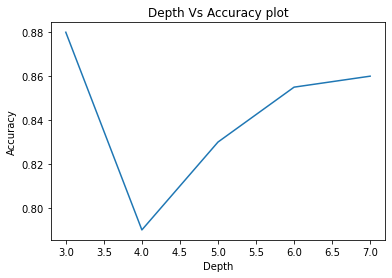

In [ ]:
plt.plot(depth_arr, acc)
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title('Depth Vs Accuracy plot')
plt.show()

In [ ]:
# 10 accuracies we have got in the cells above
acc

[0.88, 0.79, 0.83, 0.855, 0.86]

In [ ]:
# Validation set Accuracy by averaging over 10 Random 80:20 splits
avr_acc = sum(acc) / len(acc)
print("Validation set Accuracy by averaging over 10 Random 80:20 splits = ", avr_acc)

Validation set Accuracy by averaging over 10 Random 80:20 splits =  0.843


## Training the Decision Tree on Full Training set with Best Depth

## Testing the Decision Tree model on Test dataset

In [ ]:
test_data = pd.read_csv("rain_predict_test.csv")
test_data = test_data.drop('riskmm', axis = 1)
test_data = mint_modified(test_data)
test_data = maxt_modified(test_data)
test_data = rainfall_modified(test_data)
test_data = windd3_modified(test_data)
test_data = winds9_modified(test_data)
test_data = hum9_modified(test_data)
test_data = hum3_modified(test_data)
test_data = pres9_modified(test_data)
test_data = pres3_modified(test_data)
test_data = temp9_modified(test_data)
test_data = temp3_modified(test_data)
test_data = rain_modified(test_data)
# test_data = riskmm_modified(test_data)
test_data = winds3_modified(test_data)

## Calculating Accuracy of the Tree built above

In [ ]:
train_df, test_df = train_test_split(test_data, test_size = len(test_data))
# tree = decision_tree_algorithm(train_df, max_depth = 9)
# test_df

In [ ]:
train_df, test_df = train_test_split(test_data, test_size = len(test_data))
# tree = decision_tree_algorithm(test_df, max_depth = best_depth)
cal_accuracy(test_df, tree)

0.8390749217056132

In [ ]:
tree_pruned = post_pruning(tree, train_data, test_df, ml_task="classification")
print("Accuracy on the Pruned Model")
cal_accuracy(test_df, tree_pruned)

Accuracy on the Pruned Model


0.8427286597607002

## Classification report of the Decision Tree built above (without Pruning)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

          No       0.87      0.75      0.81     19420
         Yes       0.40      0.58      0.48      5486

    accuracy                           0.72     24906
   macro avg       0.63      0.67      0.64     24906
weighted avg       0.76      0.72      0.73     24906



## Modifying the Columns of the dataset for testing in sklearn Decision Tree

In [ ]:
train_data = pd.read_csv("rain_predict_train.csv")
# X_train = train_data.drop(["raint", "windd3"], axis = 1).values
X_train = train_data.drop("raint", axis = 1).values
Y_train = train_data["raint"].values

test_data = pd.read_csv("rain_predict_test.csv")
X_test = test_data.drop("raint", axis = 1).values
Y_test = test_data["raint"].values

feature_names = test_data.drop("raint", axis = 1).columns
X_train

array([[7.4, 25.1, 0.0, ..., 24.3, 'No', 0.0],
       [12.9, 25.7, 0.0, ..., 23.2, 'No', 0.0],
       [9.2, 28.0, 0.0, ..., 26.5, 'No', 1.0],
       ...,
       [3.5, 21.8, 0.0, ..., 20.9, 'No', 0.0],
       [2.8, 23.4, 0.0, ..., 22.4, 'No', 0.0],
       [5.4, 26.9, 0.0, ..., 26.1, 'No', 0.0]], dtype=object)

In [ ]:
train_data = pd.read_csv("rain_predict_train.csv")
train_data = train_data.drop('riskmm', axis = 1)
train_data = mint_modified(train_data)
train_data = maxt_modified(train_data)
train_data = rainfall_modified(train_data)
train_data = windd3_modified(train_data)
train_data = winds9_modified(train_data)
train_data = hum9_modified(train_data)
train_data = hum3_modified(train_data)
train_data = pres9_modified(train_data)
train_data = pres3_modified(train_data)
train_data = temp9_modified(train_data)
train_data = temp3_modified(train_data)
train_data = rain_modified(train_data)
# train_data = riskmm_modified(train_data)
train_data = winds3_modified(train_data)
train_data.head()

,raint,new_mint,new_maxt,new_rainfall,new_windd3,new_winds9,new_hum9,new_hum3,new_pres9,new_pres3,new_temp9,new_temp3,new_rain,new_winds3
0,No,1,1,0,15,1,1,0,1,0,1,1,1,1
1,No,2,1,0,15,2,0,0,1,0,2,1,1,1
2,No,1,1,0,0,2,1,0,2,1,1,2,1,2
3,No,2,2,0,7,2,3,0,1,0,1,2,1,2
4,No,2,2,0,13,2,1,0,1,0,2,2,1,1


## Printing the Final Decision Tree from sk-learn package(without Pruning)

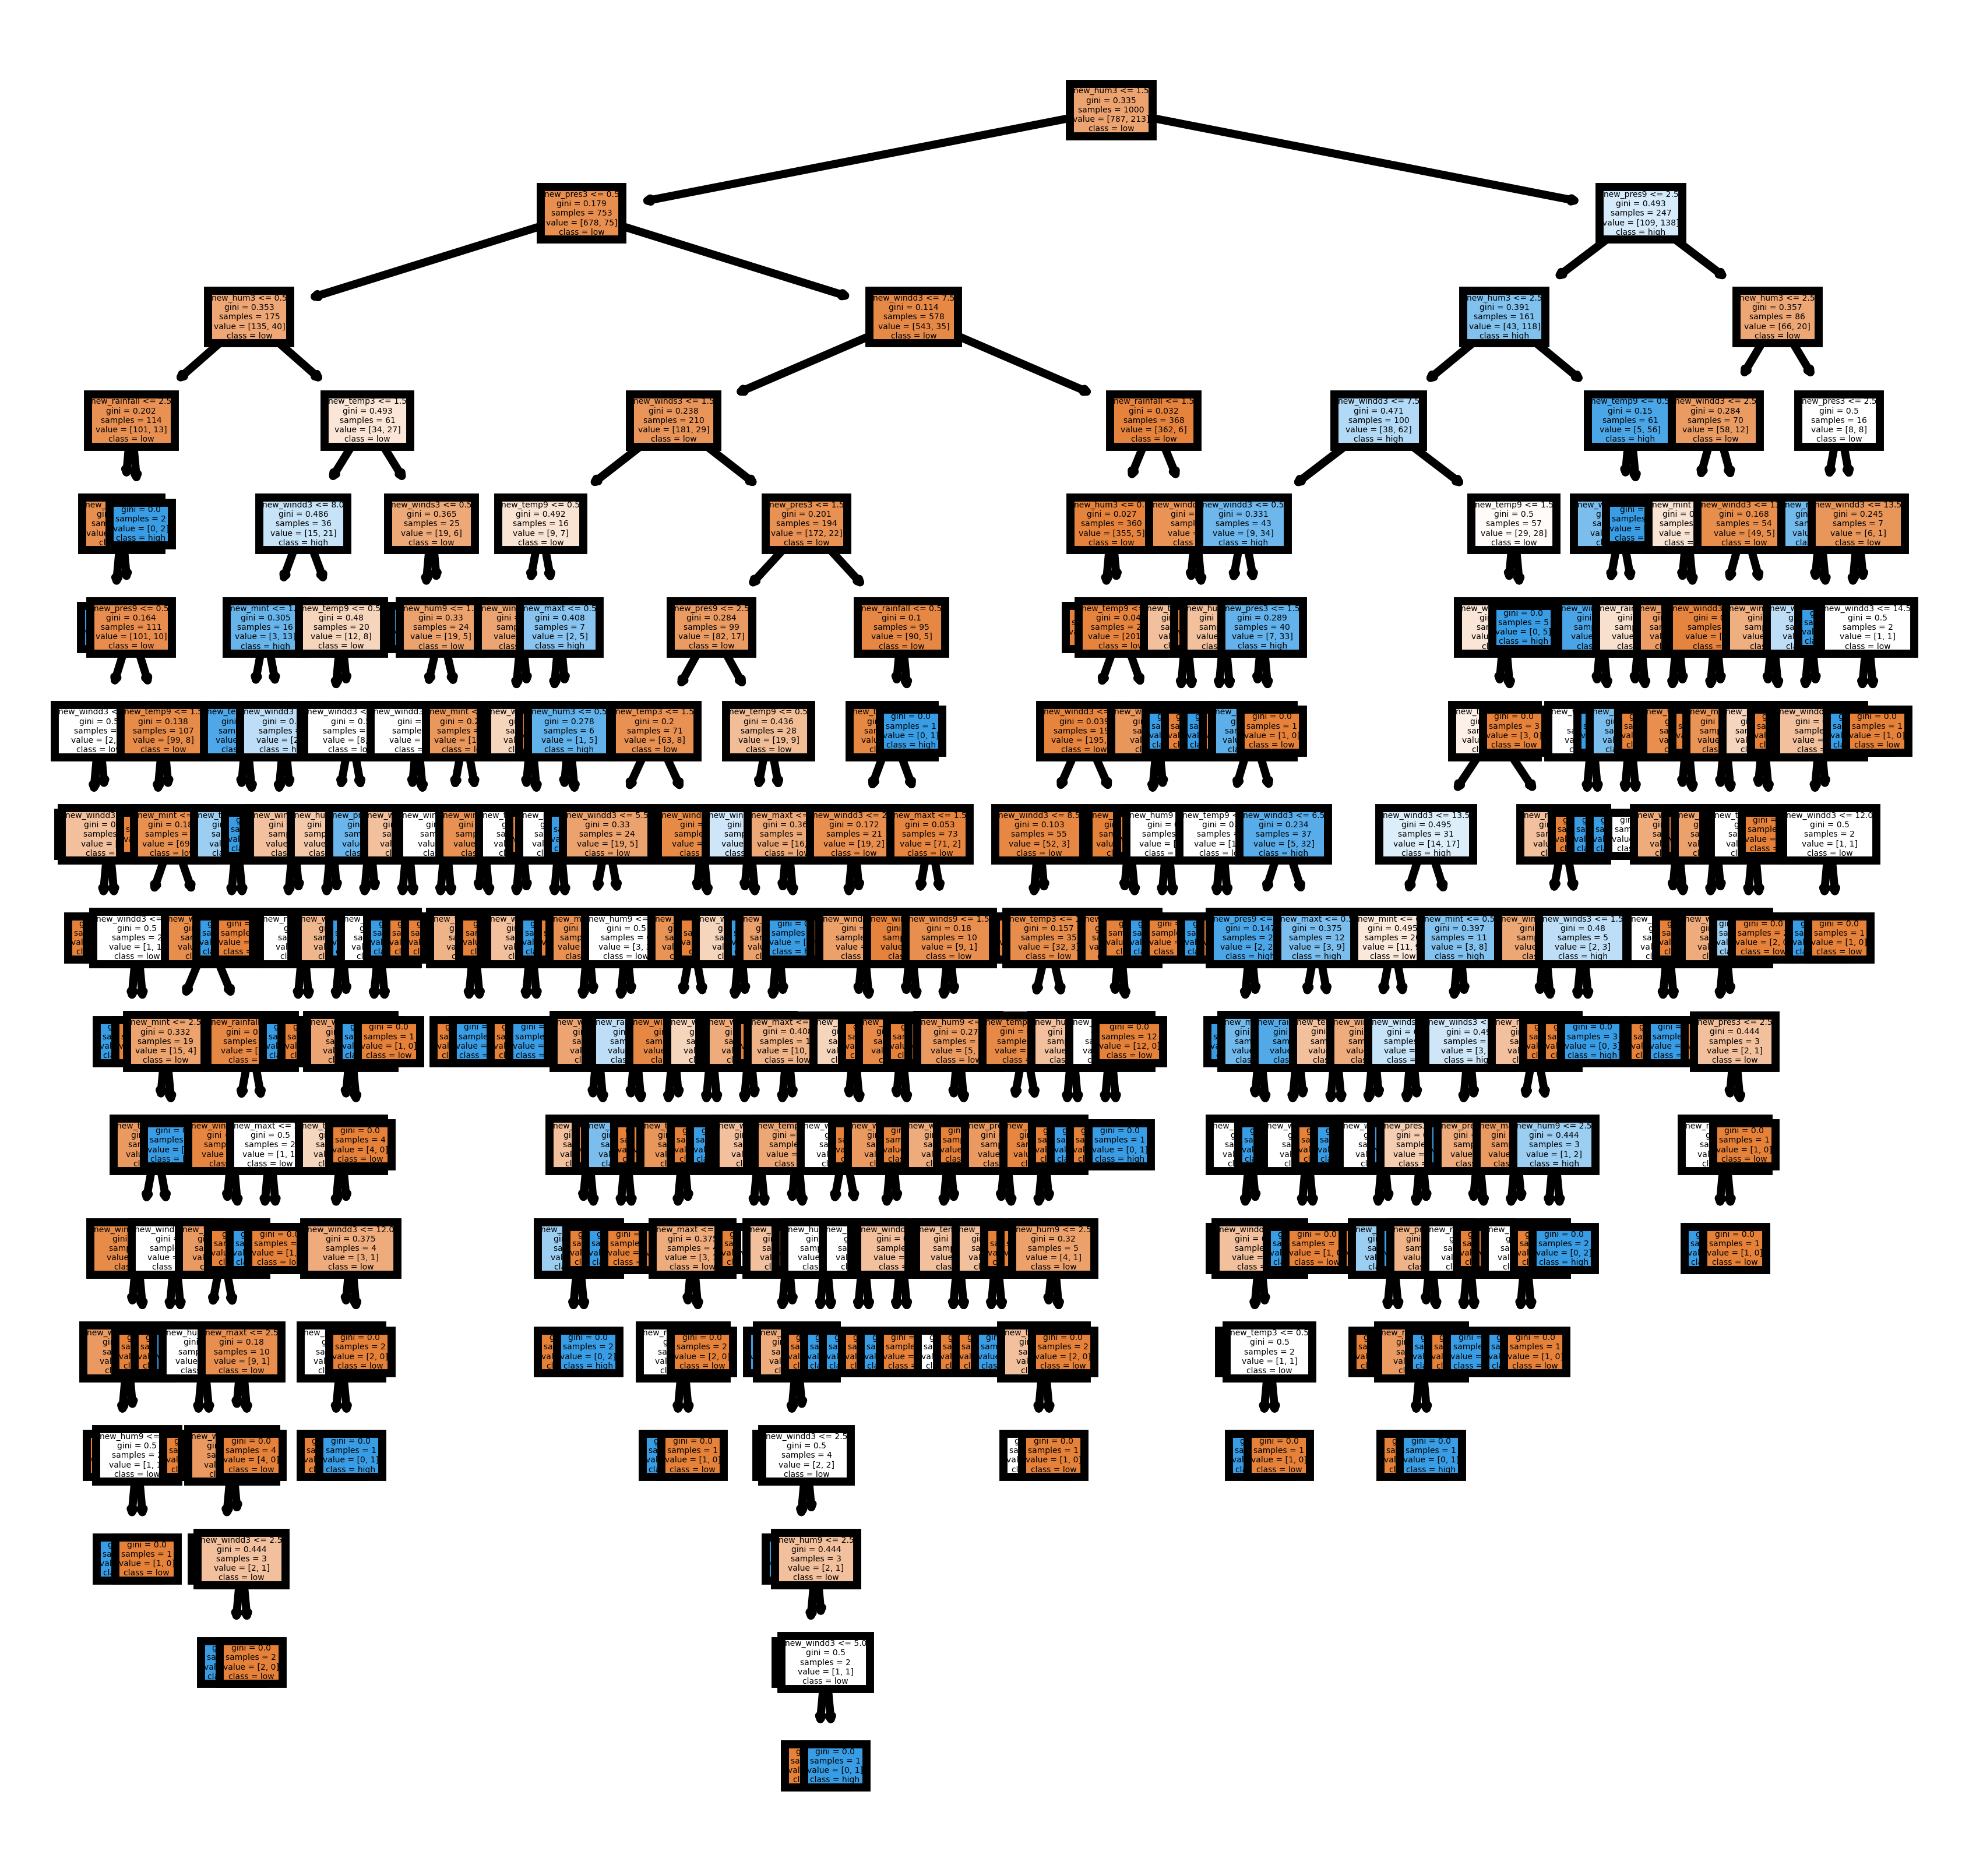

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

train_data = train_data[:1000]                                # We took a sample of dataset having 1000 instances only to train our model fast
X_train = train_data.drop(["raint"], axis = 1).values        # dropping the target feature from the features dataset
Y_train = train_data["raint"].values                         # fetching the target from the dataset


feature_names = test_data.drop("raint", axis = 1).columns       # fetching names of features from the dataset excluding target

clf = DecisionTreeClassifier(random_state = 42)                 # building the tree
clf.fit(X_train, Y_train)
plt.figure(figsize=(4,4), dpi = 1000)
plot_tree(clf, feature_names = feature_names, class_names = ('low', 'high'), filled = True)   # plotting the tree using plot_tree()
plt.show()


## Classification report for Decision Tree without pruning

In [ ]:
test_data = pd.read_csv("rain_predict_test.csv")    # importing and modifying test data
test_data = test_data.drop('riskmm', axis = 1)

test_data = mint_modified(test_data)                # converting all columns into numerical categorical columns
test_data = maxt_modified(test_data)
test_data = rainfall_modified(test_data)
test_data = windd3_modified(test_data)
test_data = winds9_modified(test_data)
test_data = hum9_modified(test_data)
test_data = hum3_modified(test_data)
test_data = pres9_modified(test_data)
test_data = pres3_modified(test_data)
test_data = temp9_modified(test_data)
test_data = temp3_modified(test_data)
test_data = rain_modified(test_data)
# test_data = riskmm_modified(test_data)
test_data = winds3_modified(test_data)

In [ ]:
# Testing the trained model
X_test = test_data.drop(["raint"], axis = 1).values
Y_test = test_data["raint"].values


y = get_predictions(test_df, tree)


print("The Accuracy on the test set is: ")
cal_accuracy(test_df, tree)

The Accuracy on the test set is: 


0.8390749217056132

In [ ]:
x = []
for i in y:             # making Y predictions into the same type as Y_test labels
    if i:
        x.append('No')
    else:
        x.append('Yes')
y = x

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y))  

              precision    recall  f1-score   support

          No       0.87      0.75      0.81     19420
         Yes       0.40      0.58      0.48      5486

    accuracy                           0.72     24906
   macro avg       0.63      0.67      0.64     24906
weighted avg       0.76      0.72      0.73     24906

